HYPOTHESIS TESTING

In [1]:
import numpy as np
import scipy.stats as st


**Z-Test**

1. Ages of Medical Doctors

In [2]:
n=30
mu=46
xbar=48.6
sd=4.2
alpha=0.05

In [4]:
z_critical = abs(st.norm.ppf(alpha))

In [5]:
z_critical

1.6448536269514729

scipy. stats. norm. ppf() is used to compute z_critical value.


In [6]:
z=(xbar-mu)/(sd/np.sqrt(n))

In [7]:
z

3.3906634512224585

In [13]:
if(z_critical>z):
  print("Null hypothesis cannot be rejected")
else:
  print("Reject Null hypothesis")

Reject Null hypothesis


If z is lessthan z_critical value null hypoythesis cannot be rejected.

**Ztest Using P-value**

In [9]:
p_val=(1-st.norm.cdf(abs(z)))*2

In [10]:
p_val

0.0006972366404673913

In [12]:
if(p_val>alpha):
  print("Null hypothesis cannot be rejected")
else:
  print("Reject Null hypothesis")

Reject Null hypothesis


**t-Test**

In [14]:
dof=n-1

In [15]:
t=z

In [16]:
t_critical=st.t.ppf(alpha/2,dof)

In [17]:
if(abs(t_critical)<abs(t)):
  print("Null hypothesis cannot be rejected")
else:
  print("Reject Null hypothesis")

Null hypothesis cannot be rejected


**t-Test using P-value**

In [19]:
p_val=(1-st.t.cdf(abs(t),dof))

In [20]:
p_val

0.00101462876427727

In [21]:
if(p_val> alpha):
  print("Null hypothesis cannot be rejected")
else:
  print("Reject Null hypothesis")

Reject Null hypothesis


**JURY SELECTION**

Null Hypothesis:-panels were selected at random from the population of eligible jurors.


Alternate Hypothesis:-panels were not selected at random

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [24]:
jury = {"Ethnicity":["Asian","Black","Latino","White","Other"],"Eligible":[0.15,0.18,0.12,0.54,0.01],"Panels":[0.26,0.08,0.08,0.54,0.04]}
jury

{'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
 'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
 'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}

In [25]:
Alameda_df=pd.DataFrame(jury)

To convert lists into datset we use pd.DataFrame

In [26]:
Alameda_df

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


In [29]:
Alameda_df=Alameda_df.set_index('Ethnicity')

To set index of a dataset we use set_index

Plot bar graph for two distributions wrt Ethnicity

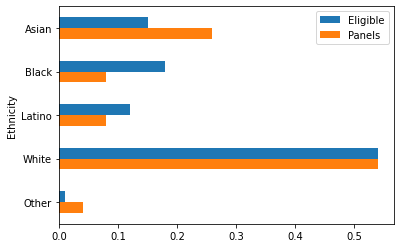

In [36]:
Alameda_df .plot.barh()
plt.gca().invert_yaxis()

Now add a column calculating distance between two distributions.

In [38]:
Alameda_df['jury_with_diffs'] = Alameda_df['Panels']-Alameda_df['Eligible']
Alameda_df

,Eligible,Panels,jury_with_diffs
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


Here in the differences the sum of positive entries and sum of negative entries is same. So to avoid cancellation we take absolute values and divide by 2 because we are adding positive entries 2 times.

In [40]:
Alameda_df['Abs.Difference']=abs(Alameda_df['jury_with_diffs'])
Alameda_df

,Eligible,Panels,jury_with_diffs,Abs.Difference
Ethnicity,,,,
Asian,0.15,0.26,0.11,0.11
Black,0.18,0.08,-0.10,0.10
Latino,0.12,0.08,-0.04,0.04
White,0.54,0.54,0.00,0.00
Other,0.01,0.04,0.03,0.03


#TVD

Total variation distance

In [41]:
test_statistic = Alameda_df['Abs.Difference'].sum()/2
test_statistic

0.14

#Sampling

lets take 1453 as panel size and do sampling with distribution of ethnicities in the eligible juror population  

In [43]:
panel_size = 1453

In [44]:
import numpy.random as npr
npr.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])

array([215, 293, 172, 760,  13])

Here output array elements add up to 1453.

In [46]:
Alameda_df_1 = pd.DataFrame(Alameda_df,columns = ['Eligible','Panels'])

Here we are creating another dataframe with only two distributions removing difference between them

In [48]:
Alameda_df_1['Random Sample'] = npr.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])/1453
Alameda_df_1

,Eligible,Panels,Random Sample
Ethnicity,,,
Asian,0.15,0.26,0.161734
Black,0.18,0.08,0.174811
Latino,0.12,0.08,0.119064
White,0.54,0.54,0.535444
Other,0.01,0.04,0.008947


Distribution of random sample is close to distribution of eligible population

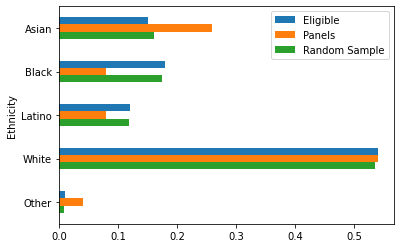

In [49]:
Alameda_df_1.plot.barh()
plt.gca().invert_yaxis()

Green and blue bars are close to each other where orange bars dont 

Now TVD is calculated between distribution of eligible population and Random sample

In [51]:
TVD = (abs(Alameda_df_1['Eligible']-Alameda_df_1['Random Sample'])).sum()/2
TVD

0.011734342739160351

TVD between eligible population and panels is 0.14 where here we got much smaller than 0.14

In [52]:
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2
def table_tvd(table, label, other):
    return total_variation_distance(table[label], table[other])

In [53]:
simulations=50
tvd_list=[]
for i in np.arange(simulations):
  Alameda_df_1["Random Sample"]=(npr.multinomial(1453,[0.15, 0.18, 0.12, 0.54, 0.01]))/1453
  tvd_list.append(table_tvd(Alameda_df_1,'Eligible','Random Sample'))
tvd_list

[0.04759119064005508,
 0.008960770818995167,
 0.02103922918100482,
 0.010247763248451437,
 0.031307639366827233,
 0.014060564349621472,
 0.005863730213351672,
 0.016304198210598756,
 0.01997247075017207,
 0.024301445285615942,
 0.03451479697178254,
 0.006551961459050286,
 0.020612525808671685,
 0.020027529249827942,
 0.012649690295939433,
 0.01641431520991052,
 0.01847212663454922,
 0.006524432209222284,
 0.021975223675154865,
 0.011686166551961474,
 0.030674466620784595,
 0.0052099105299381054,
 0.012601514108740504,
 0.015127322780454255,
 0.026139022711631116,
 0.022973158981417725,
 0.009298004129387468,
 0.0021748107364074204,
 0.024707501720578104,
 0.01625602202339991,
 0.015354439091534715,
 0.019318651066758424,
 0.015402615278733656,
 0.011768754301445339,
 0.01471438403303507,
 0.022133516861665536,
 0.01905712319339298,
 0.021438403303509997,
 0.009972470750172038,
 0.013028217481073641,
 0.03589125946317968,
 0.015492085340674495,
 0.02006194081211288,
 0.01419132828630421

Here 50 random samples are taken from eligible population where panel size is 1453 and tvd is calculated betweenn random sample and eligible distributions and appended into a list.

Now convert list into dataset 

In [56]:
tvd_final_df=pd.DataFrame(tvd_list)
tvd_final_df.rename(columns={0:"TVD"},inplace=True) # renaming column
tvd_final_df.head()

,TVD
0,0.047591
1,0.008961
2,0.021039
3,0.010248
4,0.031308


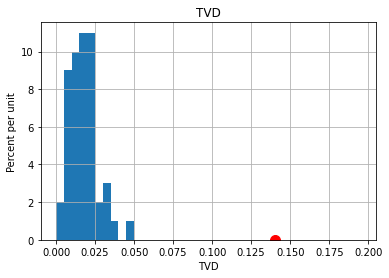

In [61]:
tvd_final_df.hist(bins=np.arange(0,0.2,0.005))
plt.ylabel('Percent per unit')
plt.xlabel('TVD')
plt.scatter(test_statistic, 0, color='red', s=100)

Here distance between panels and eligible population is 0.14 which is far awy from random samples distance.

Hence our null hypothesis was rejected.panels were not selected at random from the population of eligible jurors.